# Deep AutoEncoder To Reduce The Dimensionality Of Image

Using cifar-10 dataset.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, InputLayer, Dense

In [4]:
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
model = Sequential()

# encoder
model.add(InputLayer(shape= (3072, )))
model.add(Dense(units= 1536, activation= 'relu'))
model.add(Dense(units= 768, activation= 'relu'))

# decorder
model.add(Dense(units= 1536, activation= 'relu'))
model.add(Dense(units= 3072, activation= 'sigmoid'))

In [7]:
model.compile(optimizer= tf.keras.optimizers.Adam(), loss= 'binary_crossentropy', metrics= ['accuracy'])

In [10]:
model.fit(
    x_train,
    x_train,
    batch_size= 256,
    epochs= 50,
    validation_data= (x_test, x_test)
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 169ms/step - accuracy: 0.0037 - loss: 0.6028 - val_accuracy: 0.0039 - val_loss: 0.5992
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 165ms/step - accuracy: 0.0040 - loss: 0.5974 - val_accuracy: 0.0036 - val_loss: 0.6002
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 166ms/step - accuracy: 0.0032 - loss: 0.5926 - val_accuracy: 0.0040 - val_loss: 0.5900
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 34s 175ms/step - accuracy: 0.0045 - loss: 0.5897 - val_accuracy: 0.0069 - val_loss: 0.5879
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 165ms/step - accuracy: 0.0048 - loss: 0.5871 - val_accuracy: 0.0055 - val_loss: 0.5860
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 143ms/step - accuracy: 0.0058 - loss: 0.5851 - val_accuracy: 0.0059 - val_loss: 0.5848
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 135ms/step - accuracy: 0.0064 - loss: 0.5835 - val_accuracy: 0.0063 - val_loss: 0.5840
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.0062 - loss: 0

In [11]:
original_dimension = Input(shape= (3072, ))
encoder_layer1 = model.layers[0]
encoder_layer2 = model.layers[1]

encoder = Model(
    original_dimension,
    encoder_layer2(encoder_layer1(original_dimension))
)

In [12]:
encoded_images = encoder.predict(x_test)
decoded_images = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

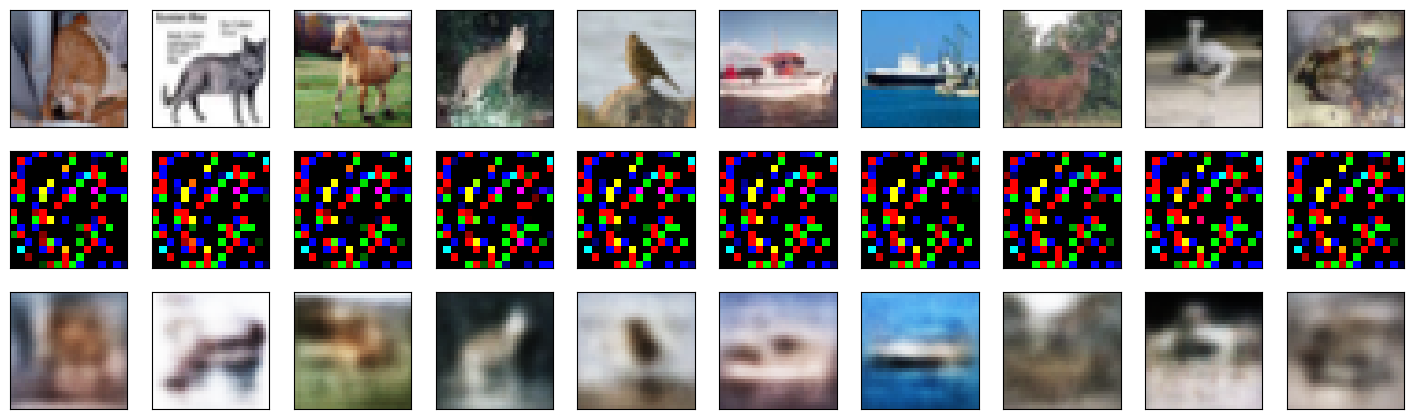

In [13]:
num_images = 10
images_test = np.random.randint(x_test.shape[0], size= num_images)

plt.figure(figsize= (18, 18))
for i, index_image in enumerate(images_test):
    # original image
    axis = plt.subplot(10, 10, i+1)
    plt.imshow(x_test[index_image].reshape(32, 32, 3))
    plt.xticks(())
    plt.yticks(())

    # encoded image
    axis = plt.subplot(10, 10, i+1+num_images)
    plt.imshow(encoded_images[index_image].reshape(16, 16, 3))
    plt.xticks(())
    plt.yticks(())

    # decoded image
    axis = plt.subplot(10, 10, i+1+num_images*2)
    plt.imshow(decoded_images[index_image].reshape(32, 32, 3))
    plt.xticks(())
    plt.yticks(())